# Red convolucional con Cifar100
_Por: Alfredo Villegas_

En el siguiente trabajo se implementará un modelo de clasificación de imágenes utilizando una CNN en el conjunto de datos cifar 100.

La primera celda importa las librerías necesarias para trabajar con TensorFlow y Keras, así como las librerías Numpy y Matplotlib. Además importamos las funciones personales.

In [2]:
import tensorflow as tf

from keras import regularizers

import numpy as np

import matplotlib.pyplot as plt

import keras.datasets.cifar100 as cifar100
from net_model import net_model

tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

En esta celda, se cargan los conjuntos de datos de entrenamiento y prueba para el problema de reconocimiento de dígitos en el dataset cifar100.

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar100.load_data()

In [4]:
train_labels[4]

array([1])

Se muestra un ejemplo de una de las imágenes:

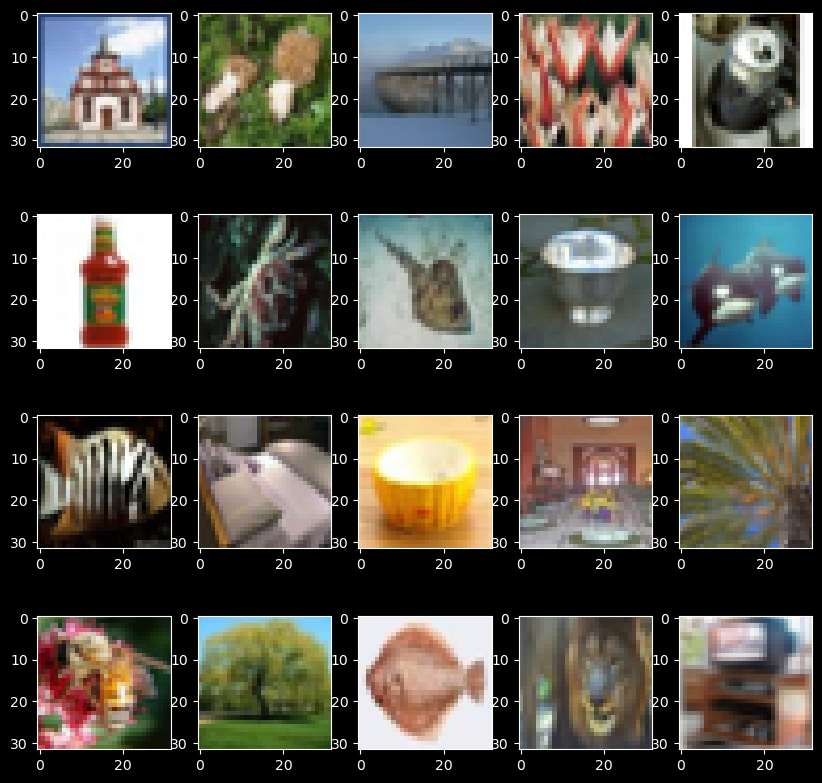

In [5]:
plt.figure(figsize=(10, 10))
for i in range(20):
    seed = None
    rng = np.random.default_rng(seed=seed)
    random_number = rng.integers(low=0,high=50000)
    cifar_img = plt.subplot(4, 5, i + 1)
    plt.imshow(train_images[random_number])

En esta celda, se llevan a cabo algunas transformaciones en los conjuntos de datos antes de ser utilizados para entrenar y probar el modelo:

1. "train_images" y "test_images" se normalizan dividiendo cada valor de píxel por 255. Esto se hace para escalar los valores de píxeles en el rango de 0 a 1, lo que facilita el procesamiento para el modelo de aprendizaje automático.

2. Luego, se modifica la forma de "train_images" y "test_images" para que sean compatibles con la entrada del modelo. Se cambia la forma de las matrices de 2D (28x28) a matrices de 3D (28x28x1), agregando una dimensión adicional que representa el número de canales de la imagen (en este caso, 1 canal porque son imágenes en escala de grises).

3. Las etiquetas de entrenamiento y prueba ("train_labels" y "test_labels") se convierten en forma de one-hot encoding utilizando la función "to_categorical" de Keras. Esto convierte las etiquetas enteras en vectores binarios de 10 dimensiones, donde cada dimensión representa una clase diferente. Esto es útil para entrenar un modelo de clasificación de múltiples clases.

En resumen, estas líneas de código normalizan las imágenes, ajustan sus formas y convierten las etiquetas en one-hot encoding, preparando los datos para su posterior uso en el entrenamiento del modelo de aprendizaje automático.

In [6]:
train_images = train_images.astype('float32') / 255 
test_images =  test_images.astype('float32') / 255 

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

In [7]:
(train_images, valid_images) = train_images[5000:], train_images[:5000]
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

In [8]:
base_filtros = 64
w_regularizer = 1e-4
n_clases = 100
train_images.shape

(45000, 32, 32, 3)

In [9]:
train_images.shape

(45000, 32, 32, 3)

En esta celda, se define la arquitectura del modelo de red neuronal convolucional utilizando la interfaz secuencial de Keras:


In [28]:
model = net_model(base_filtros, train_images, regularizers, w_regularizer, n_clases)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 activation_10 (Activation)  (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_13 (Dropout)        (None, 16, 16, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 16, 16, 256)      

Este código a continuación configura el modelo para que utilice la función de pérdida categorical_crossentropy, el optimizador rmsprop y la métrica de precisión durante el entrenamiento.

In [15]:
model.compile(
    loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"]
)
early = tf.keras.callbacks.EarlyStopping(monitor="accuracy", patience=1)

Se almacena el historico del entrenamiento del modelo

In [16]:

hist = model.fit(
    train_images,
    train_labels,
    callbacks=[early],
    validation_data=(valid_images, valid_labels),
    batch_size=64,
    epochs=30,
    verbose=1,
    shuffle=True,
)

Epoch 1/30
704/704 [==============================] - 18s 25ms/step - loss: 3.8732 - accuracy: 0.1719 - val_loss: 4.8088 - val_accuracy: 0.1372
Epoch 2/30
704/704 [==============================] - 18s 25ms/step - loss: 2.7821 - accuracy: 0.3262 - val_loss: 3.3525 - val_accuracy: 0.2660
Epoch 3/30
704/704 [==============================] - 18s 25ms/step - loss: 2.4083 - accuracy: 0.4073 - val_loss: 2.7170 - val_accuracy: 0.3616
Epoch 4/30
704/704 [==============================] - 17s 25ms/step - loss: 2.1733 - accuracy: 0.4616 - val_loss: 2.8841 - val_accuracy: 0.3402
Epoch 5/30
704/704 [==============================] - 18s 25ms/step - loss: 1.9903 - accuracy: 0.5072 - val_loss: 7.0039 - val_accuracy: 0.2416
Epoch 6/30
704/704 [==============================] - 18s 25ms/step - loss: 1.8528 - accuracy: 0.5418 - val_loss: 4.1565 - val_accuracy: 0.2994
Epoch 7/30
704/704 [==============================] - 18s 25ms/step - loss: 1.7238 - accuracy: 0.5766 - val_loss: 3.0346 - val_accuracy:

In [17]:
print(model.evaluate(test_images, test_labels, verbose=0)[1])

0.46880000829696655


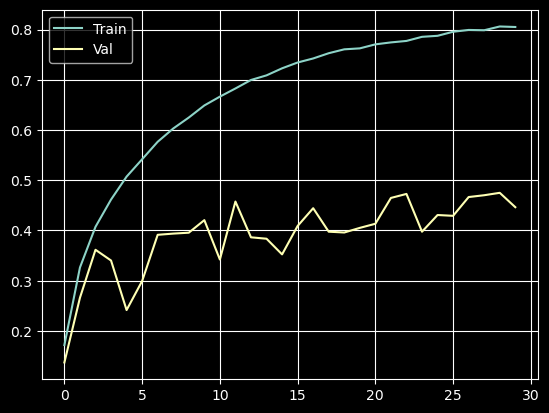

In [18]:
plt.plot(hist.history["accuracy"], label="Train")
plt.plot(hist.history["val_accuracy"], label="Val")

plt.legend()
plt.grid()
plt.show()

In [30]:
model.save("./model.h5")

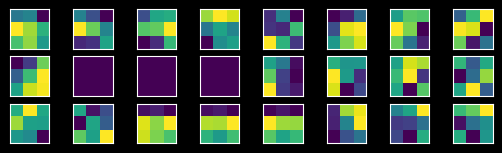

In [21]:
# retrieve weights from the first hidden layer
[filters, biases] = model.layers[0].get_weights()
# normalize filter values to 0-1 so we can visualize them
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)
# plot first few filters
n_filters, ix = 8, 1
for i in range(n_filters):
    # get the filter
    f = filters[:, :, :, i]
    # plot each channel separately
    for j in range(3):
        # specify subplot and turn of axis
        ax = plt.subplot(n_filters, 8, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(f[:, :, j])
        ix += 1
# show the figure
plt.show()

1/1 [==============================] - 0s 36ms/step


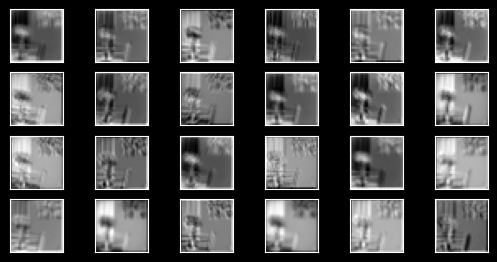

1/1 [==============================] - 0s 17ms/step


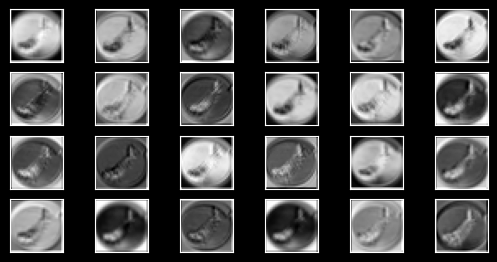

1/1 [==============================] - 0s 17ms/step


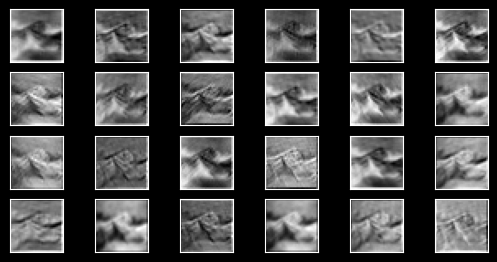

1/1 [==============================] - 0s 14ms/step


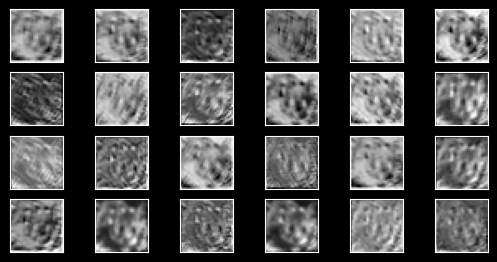

1/1 [==============================] - 0s 16ms/step


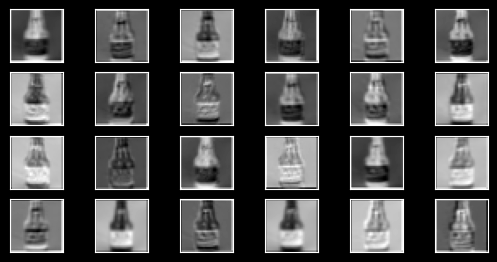

In [29]:
# redefine model to output right after the first hidden layer
modelf = tf.keras.Model(inputs=model.inputs, outputs=model.layers[0].output)
# get feature map for first hidden layer
for i in range(5):
    j = np.random.randint(0, 10000)
    feature_maps = modelf.predict(train_images[j][None, :])
    # plot all 64 maps in an 8x8 squares
    square = 6
    ix = 1
    for _ in range(square - 2):
        for _ in range(square):
            # specify subplot and turn of axis
            ax = plt.subplot(square, square, ix)
            ax.set_xticks([])
            ax.set_yticks([])
            # plot filter channel in grayscale
            plt.imshow(feature_maps[0, :, :, ix - 1], cmap="gray")
            ix += 1
    # show the figure
    plt.show()

Se intentó agregar más capas convolucionales y más épocas, no obstante se sigue obteniendo una convergencia en el 50% de la data de validación, se cree que esto puede ser debido a la data de entrenamiento de solo 45 mil imágenes, podría mejorarse aumentando la data de entrenamiento con data augmentation.
Al utilizar técnicas de interpretación y visualización, se obtiene una comprensión más profunda de las características específicas de las imágenes que están influyendo en las predicciones del modelo. Al visualizar los filtros aprendidos, se aprecia qué características, como bordes, texturas o formas específicas, el modelo está detectando en las imágenes. Además, al utilizar mapas de calor de activación, se resaltan las regiones de la imagen que son más importantes para la clasificación de una clase específica, se aprecian los contornos de las imágenes y cómo estos son parte de las características más relevantes para el entrenamiento de la red neuronal.